<div class='alert alert-info'>
    <h1>
        <center>
            <font color='Darkblue'>Hierarchical Clustering Algorithm</font>
        </center>
    </h1>
</div>

# <font color='#FF33A1'> What is Hierarchical Clustering?</font>

        1.Hierarchical Clustering in an unsupervised learning algorithm that seeks to build a heirarchy of clusters.
        
        2.Unlike K-Means (which requires specifying K),hierarchical clustering does not need the number of clusters initially.
        3.The output is useally a tree-like structure called a Dendogram ,which shows how clusters are merged or split.

# <font color='#FF33A1'>⭐ Types of Hierarchical Clustering:</font>
### 1.Agglomerative Hierarchical Clustering (Bottom-Up):

        1.Starts with each data point as its own cluster.
        2.At each step, merge the closest pair of clusters.
        3.Continue until all points are in one big cluster (or stop when a desired number of clusters is reached).
### 2.Divisive Hierarchical Clustering (Top-Down):

        1.Starts with all data points in one cluster.
        2.Recursively split the clusters until each data point is in its own cluster.
        3.Less common compared to Agglomerative.

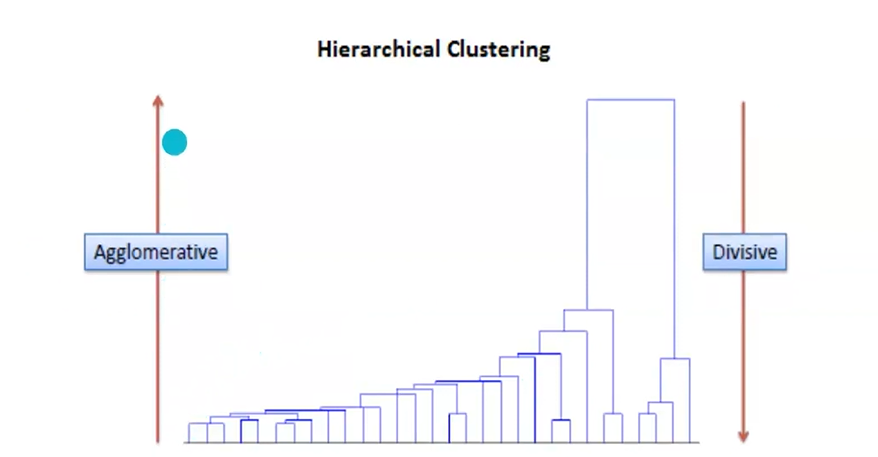

In [33]:
from PIL import Image
Image.open('s180.png')

# <font color='Darkblue'>1.Agglomerative Hierarchical Clustering (Bottom-Up):</font>

        1.Starts with each data point as its own cluster.
        2.At each step, merge the closest pair of clusters.
        3.Continue until all points are in one big cluster (or stop when a desired number of clusters is reached).

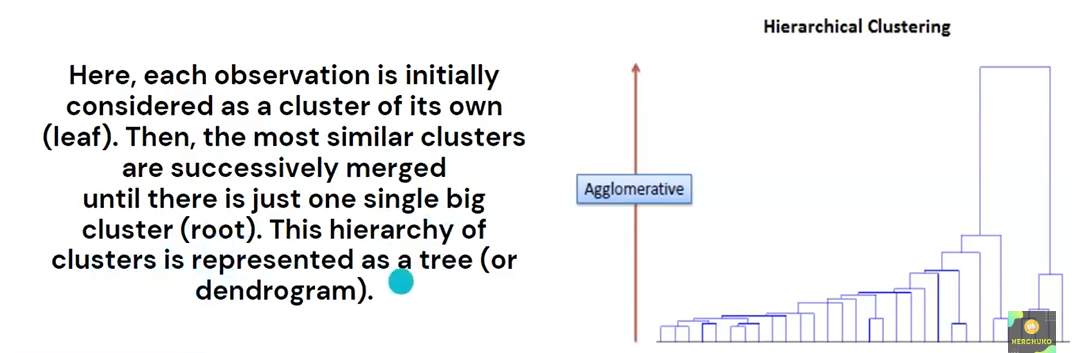

In [35]:
Image.open('s181.png')

# <font color='#FF33A1'>✅ Steps in Agglomerative Hierarchical Clustering (Most Used):</font>

### Step 1: Compute Distance Matrix
        Calculate distance (e.g., Euclidean distance) between every pair of data points.
### Step 2: Assign Each Point as a Cluster
        Start with each point as its own cluster.
### Step 3: Find Closest Clusters
        Find the two clusters that are nearest.
### Step 4: Merge Clusters
        Merge these two clusters into one.
### Step 5: Update Distance Matrix
        Recompute distances between new cluster and existing clusters.
### Step 6: Repeat
        Continue until all points are merged into a single cluster (or stop when desired number of clusters is reached).

# <font color='#FF33A1'> Linkage Criteria (How to measure distance between clusters):</font>
<table>
    <tr>
        <th>Method</th>
        <th>How Distance is Measured</th>
    </tr>
    <tr>
        <th>Single Linkage</th>
        <td>Minimum distance between points of two clusters</td>
    </tr>
    <tr>
        <th>Complete Linkage</th>
        <td>Maximum distance between points of two clusters</td>
    </tr>
    <tr>
        <th>Average Linkage</th>
        <td>Average distance between all points in two clusters</td>
    </tr>
    <tr>
        <th>Ward's Linkage
        </th>
        <td>Minimizes the variance within each cluster (minimizes total within-cluster variance)</td>
    </tr>
</table>
	
	
	

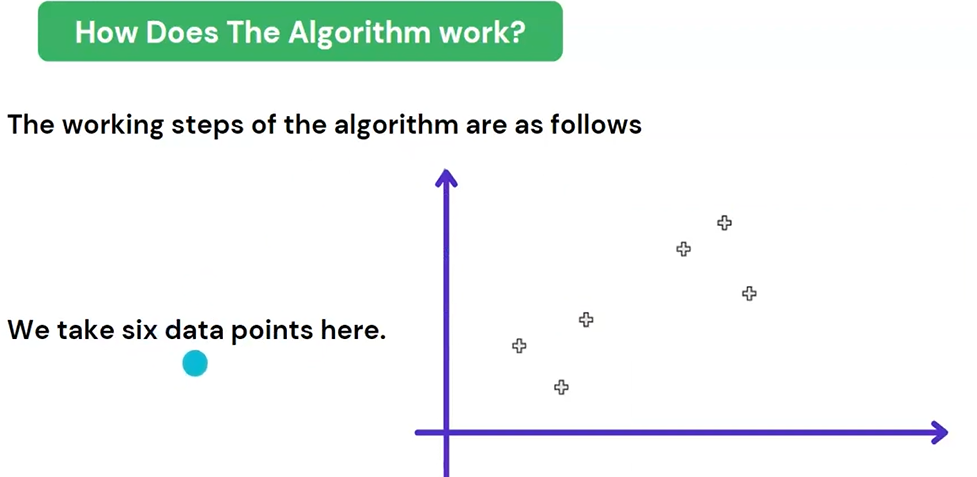

In [39]:
Image.open('s182.png')

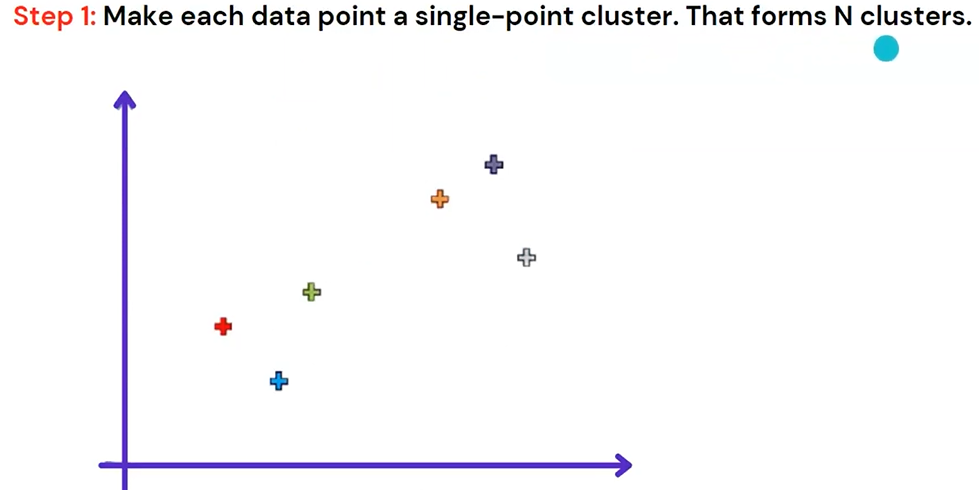

In [40]:
Image.open('s183.png')

Here is N is the total number of clusters that we are taking

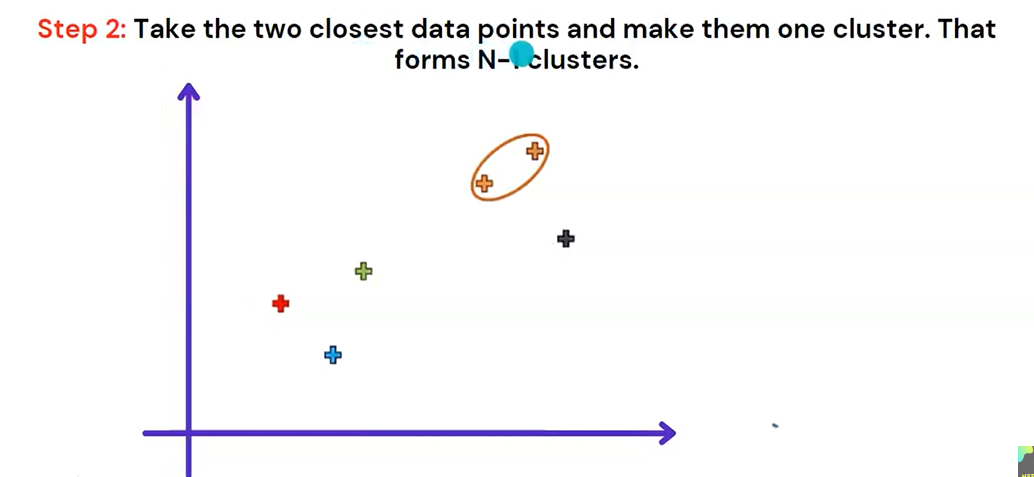

In [41]:
Image.open('s184.png')

        After merging with a nearest clusters together our N value becomes N-1 ,that initially our N is 6 after merging two nearest clusters it bacame 5.

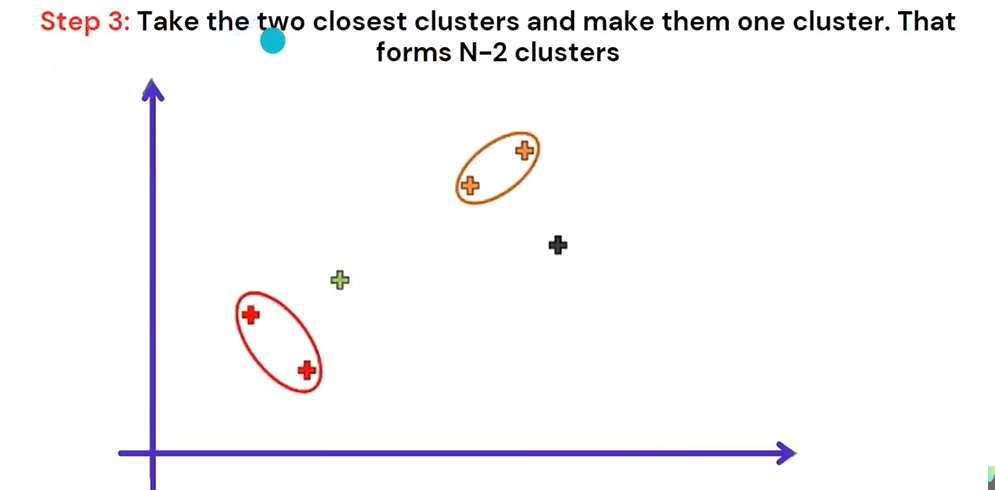

In [42]:
Image.open('s185.png')

### In K-means Clustering ,we use elbow method for selecting the number of clusters .
### For hierarchical Clustering,we use dendogram to find the number of clusters.

# <font color='#FF33A1'>Dendrogram</font>

        1.A visual representation (tree diagram) showing how clusters are merged or split.
        
        2.The height of the branches represents the distance (dissimilarity) at which clusters are merged.
### 📌 By cutting the dendrogram at a certain level, you can choose the number of clusters.

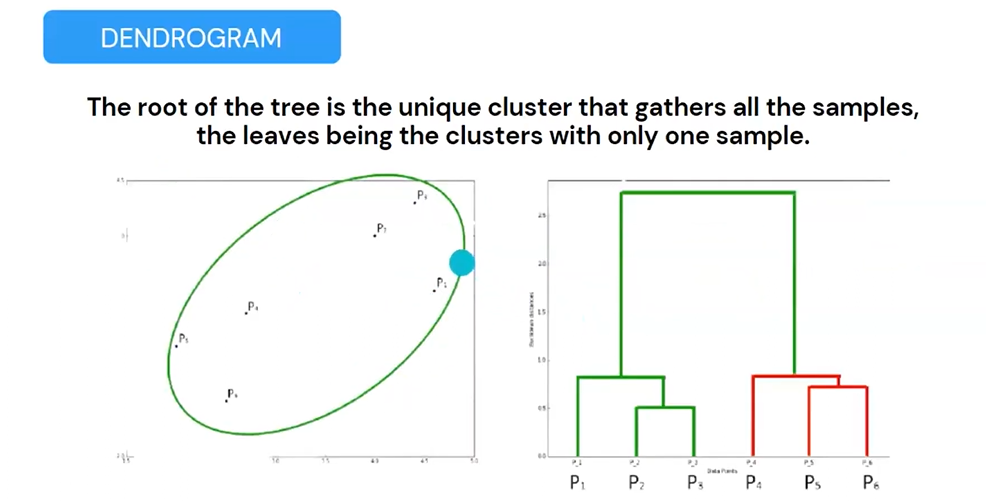

In [47]:
Image.open('s187.png')

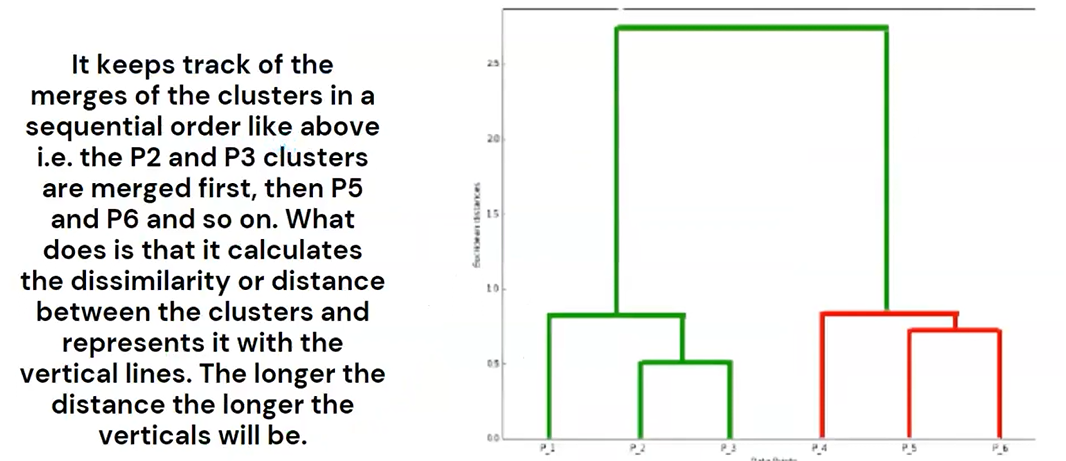

In [50]:
Image.open('s188.png')

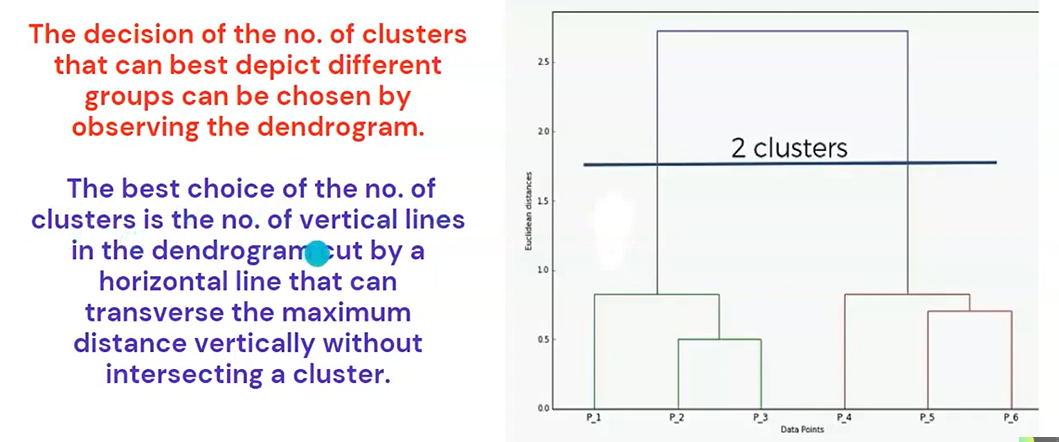

In [51]:
Image.open('s189.png')

        For Example,In the above daigram we see after drawing a horizontal line through the highest vertical distance between clusters.
        The distance between before and after of the horizontal line should be greater, that is our best choice of clusters

        The Main reason of stoping the criteria means if merge all the clusters into one cluster ,what if the some of the clusters have dissimilarity between them,that's main reason we are stoping the merging at the certain best choice finds.

# <font color='Darkblue'>Implementation of Hierarchical Clustering</font>

## Data Preprocessing

In [57]:
# importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Loading the required dataset.Here we have taken the customer info to know the customer behaviours while shopping
dataset=pd.read_csv('Mall_Customers.csv')

In [59]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


        Here,we have to find the relationship between the features that will help to predict our outcomes.
        If see here the relationship between Annual Income and Spending Score are quite in relation beacause based on the Annual income we can say he can spend this amount of money without thinking like that we have compare every feature.

In [60]:
dataset.shape

(200, 5)

In [61]:
#checking the null values
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [63]:
# Selecting the Features and Creating a Feature Matrix
X=dataset.iloc[:,[3,4]].values

In [65]:
X[0:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

## Finding the optimal number of clusters using the dendrogram

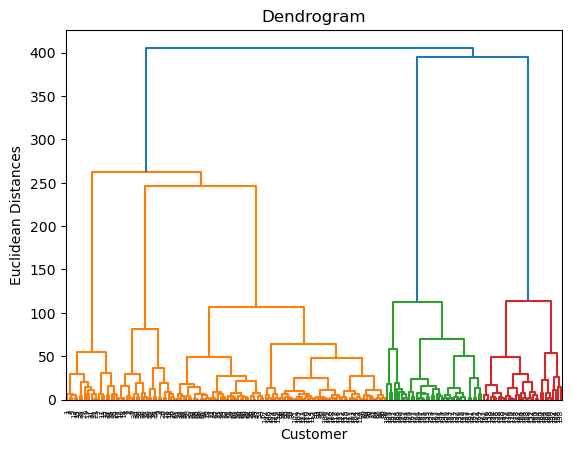

In [75]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))# 'ward', 'single', 'complete', 'average'
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distances')
plt.show()

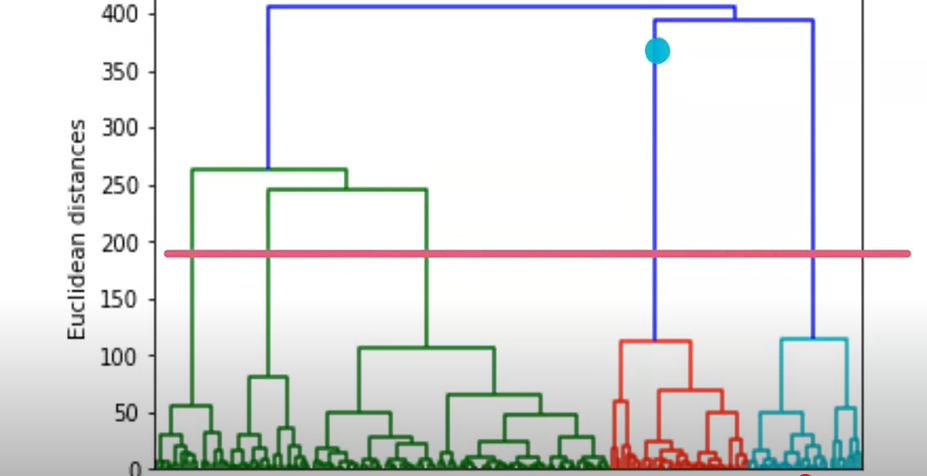

In [76]:
Image.open('s190.png')

        Here depends on the maximum vertical distance there we have to write horizontal line.
        
            Based on the horizontal line ,we have to count how many  vertical lines have cut ,that count is our optimal clusters.
            In the above daigram it cut 5 vertical clusters our clusters are 5.

# <font color='#FF33A1'>Training the Model<font>

In [83]:
#fitting  heirarchical Clustering to the dataset.
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(X)

#If using linkage='ward'	If using linkage='complete', average, single
#DON'T specify affinity (Euclidean is default)	Use metric='euclidean' instead of affinity='euclidean'

## Predicting 

In [84]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

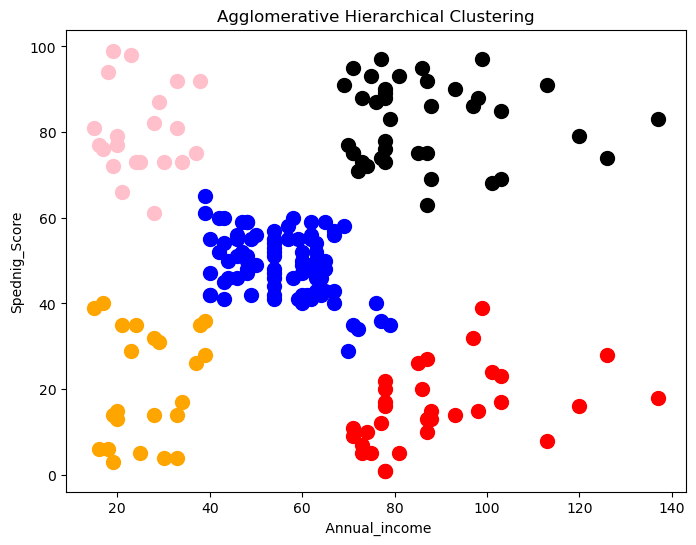

In [88]:
# Visualizing Clusters
plt.figure(figsize=(8, 6)) #X[y_hc==0, 0],X[y_hc==0, 1] represents the first column and thier clusters and second column and thier clusters

plt.scatter(X[y_hc==0, 0],X[y_hc==0, 1],s=100,c='red',label='cluter 1') # sample size (s)
plt.scatter(X[y_hc==1, 0],X[y_hc==1, 1],s=100,c='blue',label='cluter 2')
plt.scatter(X[y_hc==2, 0],X[y_hc==2, 1],s=100,c='black',label='cluter 3')
plt.scatter(X[y_hc==3, 0],X[y_hc==3, 1],s=100,c='pink',label='cluter 4')
plt.scatter(X[y_hc==4, 0],X[y_hc==4, 1],s=100,c='orange',label='cluter 5')
plt.xlabel(' Annual_income')
plt.ylabel('Spednig_Score')
plt.title('Agglomerative Hierarchical Clustering')
plt.show()


# <font color='Darkblue'>✅ Advantages of Hierarchical Clustering:</font>
 ####       1.No need to specify number of clusters in advance (can decide later using dendrogram).
 ####       2.Suitable for small datasets where detailed hierarchy is useful.
 ####       3.Gives interpretable hierarchy structure.


# <font color='Darkblue'>✅ Disadvantages:</font>
#### 1.Computationally expensive for large datasets.
#### 2.Not suitable for very large datasets (time complexity is 𝑂(𝑛3))
#### 3.Sensitive to noise and outliers.

# <font color='Darkblue'>✅ Applications of Hierarchical Clustering:</font>
#### 1.Gene expression data analysis (biological data).
#### 2.Customer segmentation.
#### 3.Document or text clustering.
#### 4.Anomaly detection.
#### 5.Image segmentation.


# ✅ Summary Table:
<table>
    <tr>
        <th>Aspect</th>
        <th>Description</th>
    </tr>	
    <tr>
        <th>Type</th>
       <td>Unsupervised Learning</td>
    </tr>
    <tr>
        <th>Purpose</th>
        <td>Group similar data points</td>
    </tr>	
    <tr>
        <th>Types</th>
       <td>Agglomerative (bottom-up), Divisive (top-down)</td>
    </tr>
    <tr>
        <th>Common Linkage Methods</th>
       <td>Single, Complete, Average, Ward</td>
    </tr>
    <tr>
        <th>Visualization Tool</th>
        <td>Dendrogram</td>
    </tr>	
    <tr>
        <th>Cluster Selection</th>
       <td>By cutting dendrogram at desired height</td>
    </tr>
    
</table>